In [18]:
import pandas as pd

Problem 1 - Data Read, Write and Inspect:

In [19]:
df1=pd.read_csv('./bank .csv')

In [20]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [22]:
df1.select_dtypes(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [23]:
df1.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [24]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [25]:
new=df1.select_dtypes(exclude=object)

In [26]:
new

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [27]:
new.to_csv('banknumeric.data')

In [28]:
new.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [29]:
new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Problem 2 - Data Imputations:

In [30]:
df2=pd.read_csv('./medical_students_dataset.csv')

In [31]:
df2.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [33]:
df2.shape

(200000, 13)

In [34]:
df2.isnull().sum()

Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64

In [35]:
df2.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [36]:
numeric_columns = ['Student ID','Age','Height', 'Weight', 'BMI', 'Temperature', 'Heart Rate' , 'Blood Pressure', 'Cholesterol']
column_means = df2[numeric_columns].mean()
df2.fillna(column_means, inplace=True)


In [37]:
categorical_columns = ['Gender', 'Blood Type' ,'Diabetes', 'Smoking']
mode_values = df2[categorical_columns].mode()
df2.fillna(mode_values.iloc[0],inplace=True)

In [38]:
df2.isnull().sum()

Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

In [39]:
df2.duplicated().sum()

12572

In [40]:
df2.drop_duplicates(inplace=True)

3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:

Problem - 1:

In [41]:
df3=pd.read_csv('./Titanic-Dataset.csv')

In [42]:
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
subset_df3 = df3[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

first_class_df3 = subset_df3[subset_df3['Pclass'] == 1]


mean_fare = first_class_df3['Fare'].mean()
median_fare = first_class_df3['Fare'].median()
min_fare = first_class_df3['Fare'].min()
max_fare = first_class_df3['Fare'] .max()

print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Maximum Fare: {max_fare}")
print(f"Minimum Fare: {min_fare}")

Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


Problem - 2:

In [44]:
df3['Age'].isnull().sum()

177

In [45]:
df3['Age'].dropna(inplace=True)

Problem - 3:

In [46]:
df3.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [47]:
encoded_embarked = pd.get_dummies(df3['Embarked'], prefix='Embarked')

In [48]:
df4 = pd.concat([df3, encoded_embarked], axis=1)

In [49]:
df4.drop('Embarked',axis=1,inplace=True)

In [50]:
df4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


Problem - 4:

In [51]:
mean_survival_rates = df4.groupby('Sex')['Survived'].mean()
mean_survival_rates


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [52]:
import matplotlib.pyplot as plt

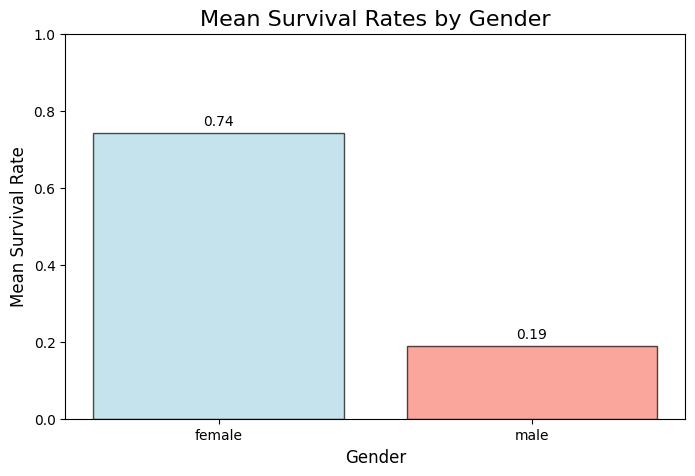

In [53]:
plt.figure(figsize=(8, 5))
genders = mean_survival_rates.index
mean_rates = mean_survival_rates.values

plt.bar(genders, mean_rates, color=['lightblue', 'salmon'], edgecolor='black', alpha=0.7)
plt.title('Mean Survival Rates by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Mean Survival Rate', fontsize=12)
plt.ylim(0, 1)
for i, rate in enumerate(mean_rates):
    plt.text(i, rate + 0.02, f"{rate:.2f}", ha='center', fontsize=10, color='black')

plt.show()

Problem - 5:

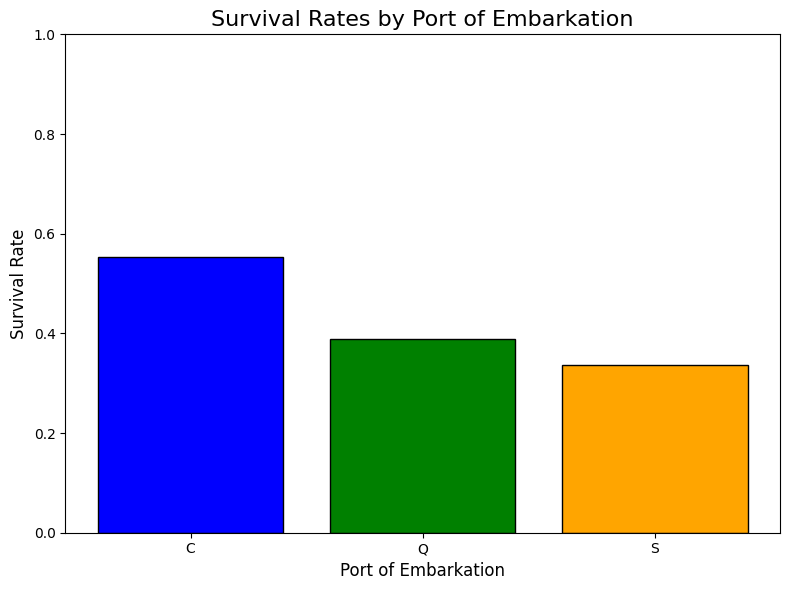

In [54]:
embarked_survival = df3.groupby('Embarked')['Survived'].mean().reset_index()
embarked_survival_filtered = embarked_survival[embarked_survival['Embarked'].isin(['C', 'Q', 'S'])]
ports = embarked_survival_filtered['Embarked']
survival_rates = embarked_survival_filtered['Survived']
plt.figure(figsize=(8, 6))
plt.bar(ports, survival_rates, color=['blue', 'green', 'orange'], edgecolor='black')
plt.title('Survival Rates by Port of Embarkation', fontsize=16)
plt.xlabel('Port of Embarkation', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.ylim(0, 1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()